https://www.kaggle.com/code/ryanholbrook/what-is-feature-engineering

Don't forget to add the Concrete Compressive Strength data set...
https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength

Note that the name and the process of reading it has changed.

Weird.  Internet is off by default, preventing installation of pip modules...
https://stackoverflow.com/questions/58798115/downloading-files-in-kaggle-gives-failed-temporary-failure-in-name-resolutio

In [3]:
# Required (but not specified in the original tutorial) to read the file
!pip install xlrd 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.1 MB/s eta 0:00:00a 0:00:010m


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#df = pd.read_csv("../input/fe-course-data/concrete.csv")
df=pd.read_excel('/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls',sheet_name='Sheet1')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Not that the data frame keys have changed.  The one I need, compressive strength, has a blank at the very end, which is, of course, required :(

In [5]:
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
X = df.copy()
y = X.pop("Concrete compressive strength(MPa, megapascals) ")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.397


The new names are too verbose--a hassle.  So I will rename to the versions used by the original (very outdated it appears) tutorial.  I had to rely on manual verification to ensure that the column names corresponded.

In [7]:
new_column_names = df.columns.values.tolist()
tutorial_column_names = ["Cement","BlastFurnaceSlag","FlyAsh","Water",
                         "Superplasticizer","CoarseAggregate","FineAggregate",
                         "Age","CompressiveStrength"]
columns_dict = dict(zip(new_column_names, tutorial_column_names))

df.rename(columns=columns_dict, inplace=True)

df.keys()

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [8]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 8.01


Just got this dataset working, so I don't want to quit here.  Trying some of the other related tutorials

https://www.kaggle.com/code/sinamhd9/starter-concrete-compressive-strength

In [10]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=2)

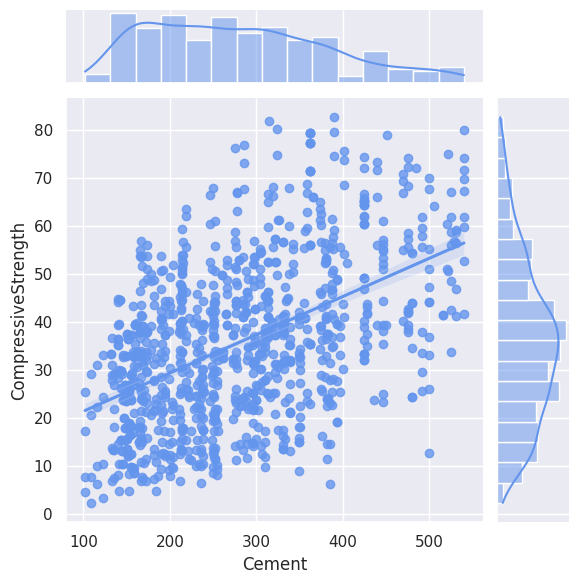

In [16]:
cols = df.columns
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=df, x=cols[0], y=cols[-1]
                  ,kind='reg',color=color[3])
plt.show()

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [14]:
display(df.describe())

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


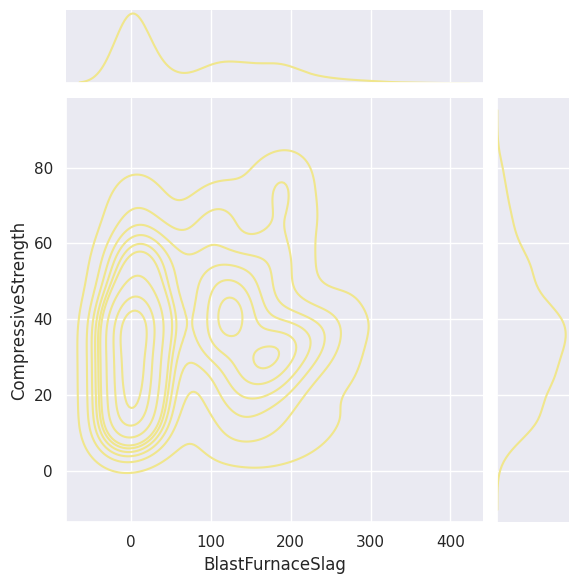

In [15]:
sns.jointplot(data=df, x=cols[1], y=cols[-1]
                  ,kind='kde',color=color[1])
plt.show()

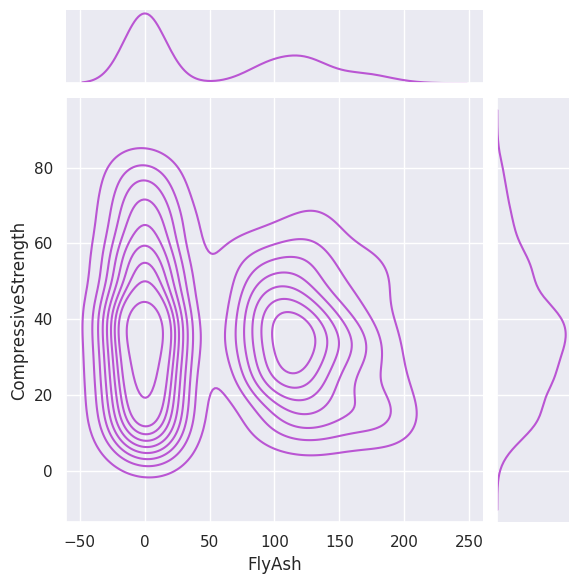

In [17]:
sns.jointplot(data=df, x=cols[2], y=cols[-1]
                  ,kind='kde',color=color[2])
plt.show()